# Analyse des données

In [22]:
from acces_bdd import Bdd
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
class Bdd :

    @classmethod
    def ouvrir_connexion(cls):
        cls.bdd = mysql.connector.connect(user='isen', password='isen', host='localhost', port="8081", database='vgsales')
        cls.curs = cls.bdd.cursor()

    @classmethod
    def fermer_connexion(cls):
        cls.curs.close()
        cls.bdd.close()

    @classmethod
    def aff_platform(cls):
        cls.ouvrir_connexion()
        cls.curs.execute("SELECT * FROM plateforme")
        result = cls.curs.fetchall()
        cls.fermer_connexion()
        return result

    @classmethod
    def jeux_genre(cls, genre):
        cls.ouvrir_connexion()
        cls.curs.callproc("jeu_genre", [genre])
        for result in cls.curs.stored_results():
            return result.fetchall()
        cls.fermer_connexion()
    
    @classmethod
    def ventes_annee_platf(cls):
        cls.ouvrir_connexion()
        cls.curs.callproc("sales_year_platform")
        for result in cls.curs.stored_results():
            return result.fetchall()
        cls.fermer_connexion()

In [24]:
plateformes = Bdd.aff_platform()
print("il y a", len(plateformes), "plateformes différentes :")
for i in plateformes :
    print(i[1])

il y a 31 plateformes différentes :
Wii
NES
GB
DS
X360
PS3
PS2
SNES
GBA
3DS
PS4
N64
PS
XB
PC
2600
PSP
XOne
GC
WiiU
GEN
DC
PSV
SAT
SCD
WS
NG
TG16
3DO
GG
PCFX


In [25]:
liste_shooters = Bdd.jeux_genre("Shooter")
print("|{:<50}|{:^12}|{:^16}|{:^16}|".format("Titre", "plateforme", "année parution", "ventes mondiales"))
for i in range(len(liste_shooters)):
    print("|{:<50}|{:^12}|{:^16}|{:^16}|".format(liste_shooters[i][2], liste_shooters[i][3], liste_shooters[i][4], liste_shooters[i][11]))

|Titre                                             | plateforme | année parution |ventes mondiales|
|Duck Hunt                                         |     2      |      1984      |      28.0      |
|Call of Duty: Modern Warfare 3                    |     5      |      2011      |      15.0      |
|Call of Duty: Black Ops                           |     5      |      2010      |      15.0      |
|Call of Duty: Black Ops 3                         |     11     |      2015      |      14.0      |
|Call of Duty: Black Ops II                        |     6      |      2012      |      14.0      |
|Call of Duty: Black Ops II                        |     5      |      2012      |      14.0      |
|Call of Duty: Modern Warfare 2                    |     5      |      2009      |      14.0      |
|Call of Duty: Modern Warfare 3                    |     6      |      2011      |      13.0      |
|Call of Duty: Black Ops                           |     6      |      2010      |      13.0      |


## Affichage des ventes mondiales par année, tous jeux confondus

In [26]:
sales_a_p = Bdd.ventes_annee_platf()

In [27]:
print(len(sales_a_p), sales_a_p[0])

16327 ('Wii', 2006, 83.0)


In [28]:
df = pd.DataFrame(sales_a_p, columns = ['Platform', 'Year', 'Global_Sales'])
df

,Platform,Year,Global_Sales
0,Wii,2006,83.0
1,Wii,2008,36.0
2,Wii,2009,33.0
3,Wii,2006,29.0
4,Wii,2009,29.0
...,...,...,...
16322,3DO,1995,0.0
16323,3DO,1994,0.0
16324,3DO,1995,0.0
16325,GG,1992,0.0


In [30]:
gg = df.groupby('Platform')['Global_Sales'].sum()
gg = gg.sort_values(ascending = False)
gg = pd.DataFrame(gg)

selection = gg.iloc[:6,:0]
print(selection.index)

Index(['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS'], dtype='object', name='Platform')


In [64]:
selection2 = ['PS3', 'PS4', 'X360', 'XOne', 'WiiU', '3DS', 'PC']
selection3 = ['NES', 'NG', 'SNES', 'N64', 'GB', '2600' ]

In [32]:
df2 = df.copy()

for ligne in df2.index :
    if df2['Platform'][ligne] not in selection.index :
        df2.drop(index=ligne, inplace=True)


In [65]:
df3 = df.copy()

for ligne in df3.index :
    if df3['Platform'][ligne] not in selection2 :
        df3.drop(index=ligne, inplace=True)

In [66]:
df4 = df.copy()

for ligne in df4.index :
    if df4['Platform'][ligne] not in selection3 :
        df4.drop(index=ligne, inplace=True)

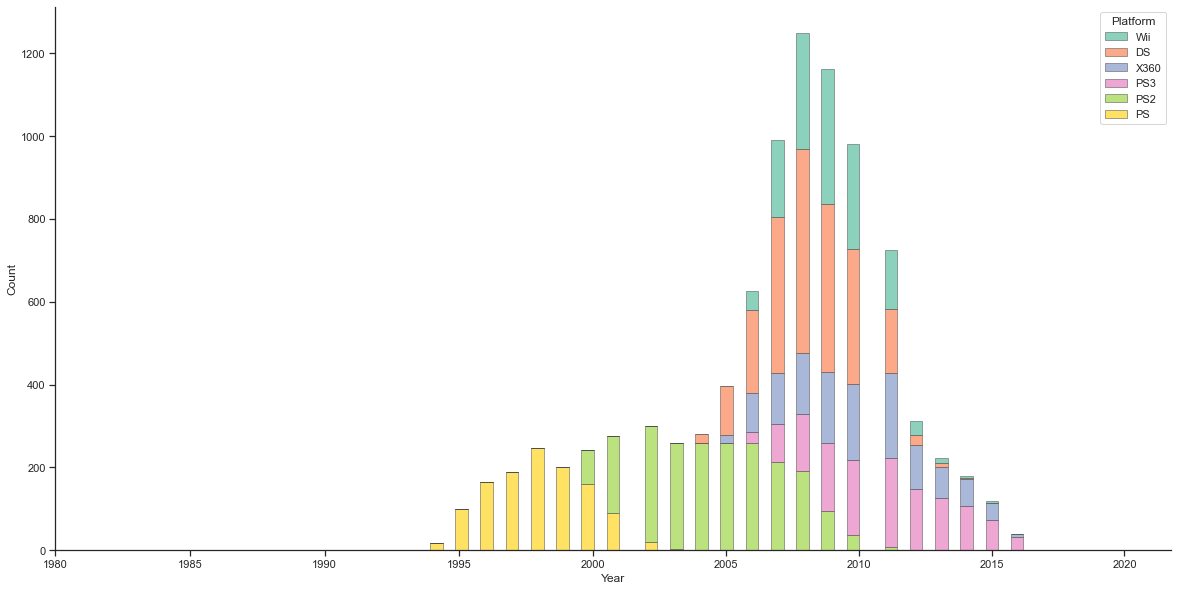

In [13]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

sns.histplot(
    df2,
    x="Year", hue="Platform",
    multiple="stack",
    palette="Set2",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020])

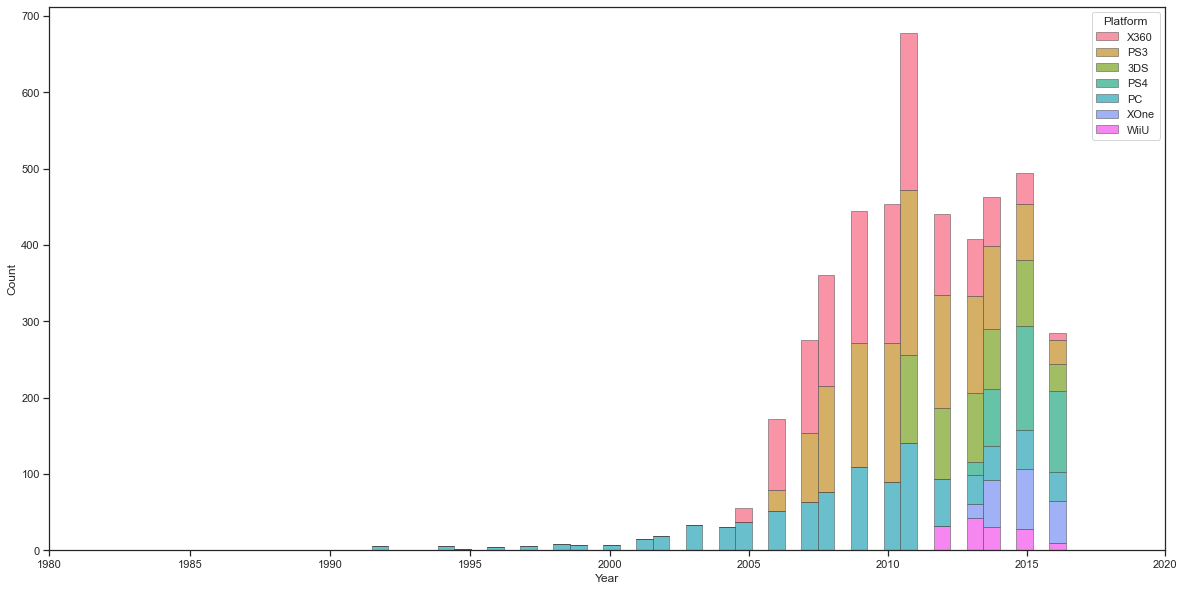

In [35]:
sns.set_theme(style="ticks")

f3, ax3 = plt.subplots(figsize=(20, 10))
sns.despine(f)

sns.histplot(
    df3,
    x="Year", hue="Platform",
    multiple="stack",
    palette="husl",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax3.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax3.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020])

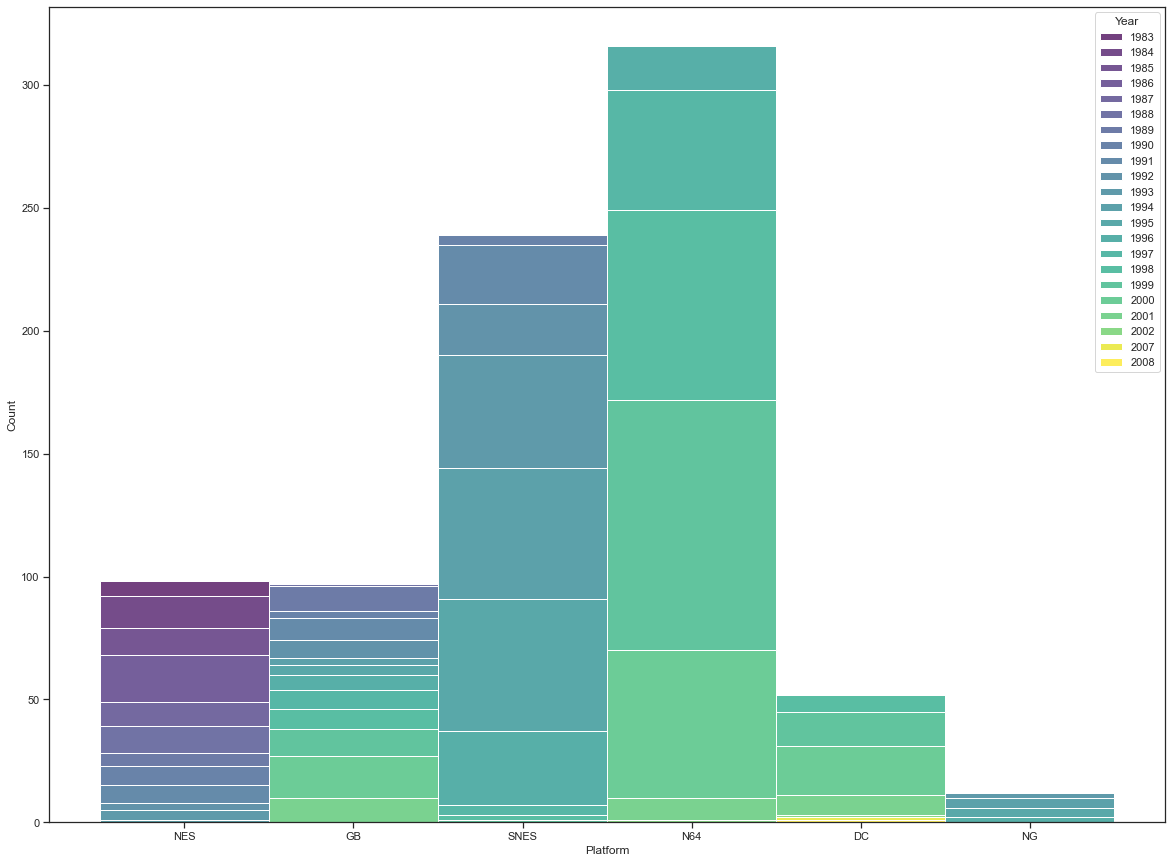

In [63]:
plt.figure(figsize=(20,15))

sns.histplot(data=df4, x="Platform", hue="Year", bins=4,  multiple="stack", palette="viridis",)

plt.show()

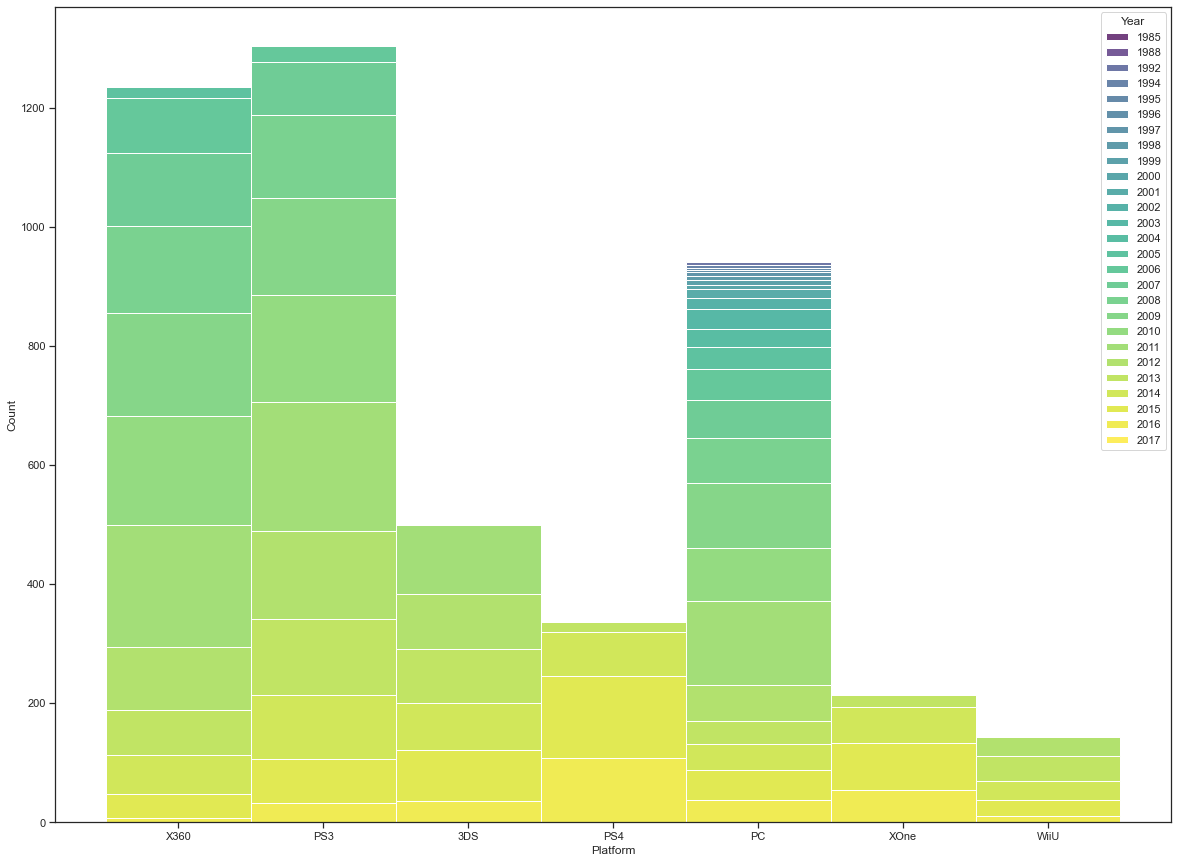

In [67]:
plt.figure(figsize=(20,15))

sns.histplot(data=df3, x="Platform", hue="Year", bins=4,  multiple="stack", palette="viridis",)

plt.show()